<a href="https://colab.research.google.com/github/santolina/Convolutional-Neural-Networks-in-TensorFlow/blob/master/Course_4_Week_1_Exercise_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install tensorflow==2.0.0b1
!pip install tensorflow==2.0
#%tensorflow_version 2.x

     |████████████████████████████████| 86.3MB 114kB/s 
     |████████████████████████████████| 3.8MB 32.3MB/s 
     |████████████████████████████████| 450kB 43.9MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 2.0.0b1
    Uninstalling tensorflow-2.0.0b1:
      Successfully uninstal

In [1]:
import tensorflow as tf
print(tf.__version__)

# EXPECTED OUTPUT
# 2.0.0-beta1 (or later)


2.0.0


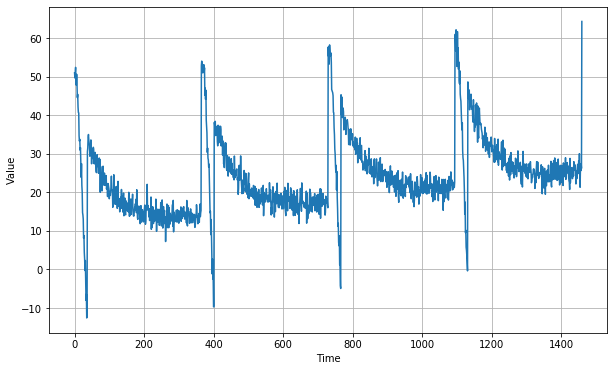

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

# EXPECTED OUTPUT
# Chart as in the screencast. First should have 5 distinctive 'peaks'

Now that we have the time series, let's split it so we can start forecasting

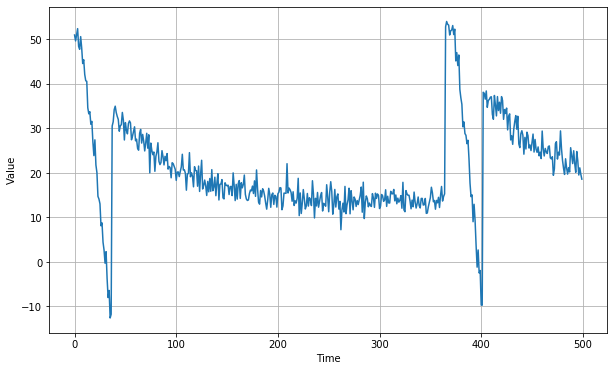

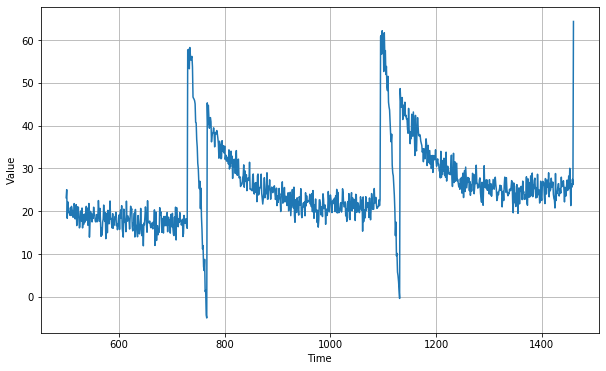

In [3]:
split_time = 500 # YOUR CODE HERE
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

# EXPECTED OUTPUT
# Chart WITH 4 PEAKS between 50 and 65 and 3 troughs between -12 and 0
# Chart with 2 Peaks, first at slightly above 60, last at a little more than that, should also have a single trough at about 0

# Naive Forecast

In [5]:
naive_forecast = series[split_time - 1: -1] #YOUR CODE HERE]
print(naive_forecast)

[18.605005  23.146152  25.037     18.346571  22.196327  19.696924
 19.952894  19.672398  19.060333  20.817558  18.991875  21.128992
 20.422935  19.981865  18.581984  19.181908  21.785547  21.216877
 18.201157  20.297092  21.544287  16.646696  21.017118  18.550928
 20.964025  18.243822  16.10894   16.412823  19.714108  20.088226
 17.711798  20.750061  16.103062  19.247942  16.91283   17.986704
 19.341429  17.482788  18.392212  21.132326  17.925077  20.710058
 16.739756  20.019945  21.805307  13.94137   17.254004  19.96571
 18.369875  19.48328   17.498652  18.846039  18.328339  20.942677
 19.083952  19.218885  17.68906   17.507292  17.587627  19.212427
 17.552868  18.946226  22.489836  20.054153  17.633234  20.661583
 17.41737   14.132123  16.167528  14.417918  17.43274   18.149328
 21.442545  18.721148  17.607155  19.682669  13.580514  18.453365
 19.503633  14.984909  20.210173  18.58064   17.054453  19.132362
 22.390337  18.195215  18.31083   16.878939  16.081612  19.425966
 16.03748  

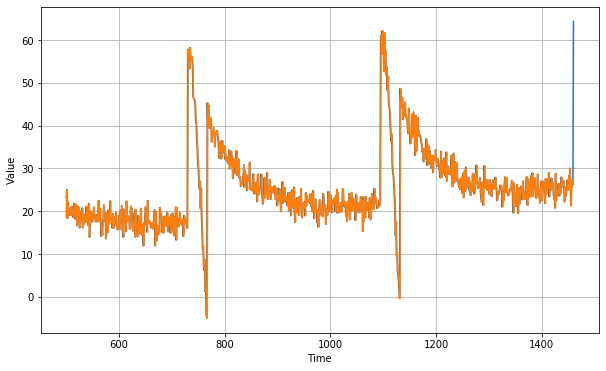

In [6]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

# Expected output: Chart similar to above, but with forecast overlay

Let's zoom in on the start of the validation period:

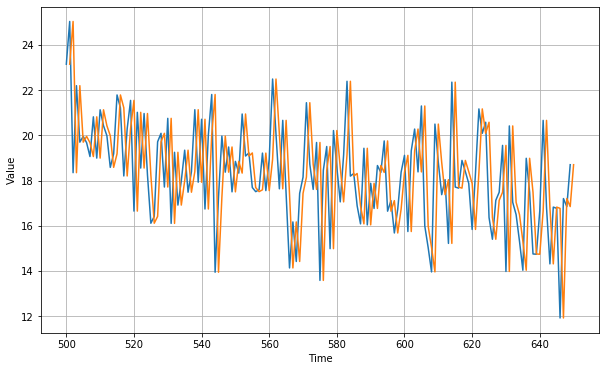

In [7]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150) # YOUR CODE HERE)
plot_series(time_valid, naive_forecast, start=1, end=151) # YOUR CODE HERE)

# EXPECTED - Chart with X-Axis from 1100-1250 and Y Axes with series value and projections. Projections should be time stepped 1 unit 'after' series

Now let's compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period:

In [8]:
mse = np.sum((x_valid - naive_forecast) ** 2) / len(x_valid)
mae = np.sum(abs (x_valid - naive_forecast )) / len(x_valid)

print(mse)
print(mae)
# Expected Output
# 19.578304
# 2.6011968

18.247280664672218
2.4910381845083247


That's our baseline, now let's try a moving average:

In [0]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  # YOUR CODE HERE
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

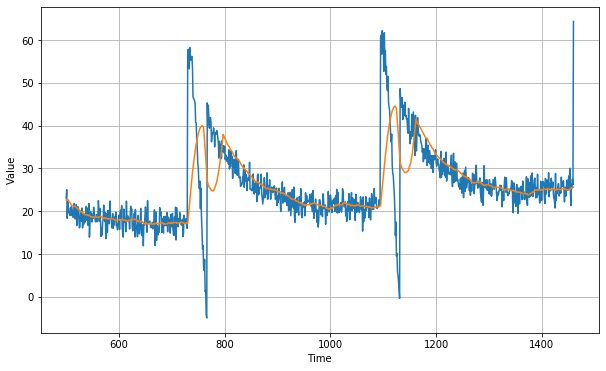

In [10]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30: ]# YOUR CODE HERE)[# YOUR CODE HERE]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)
    
# EXPECTED OUTPUT
# CHart with time series from 1100->1450+ on X
# Time series plotted
# Moving average plotted over it

In [11]:
mse = np.sum((x_valid - moving_avg) ** 2) / len(x_valid)
mae = np.sum(abs (x_valid - moving_avg )) / len(x_valid)

print(mse)
print(mae)
# EXPECTED OUTPUT
# 65.786224
# 4.3040023

62.629101359261185
3.956339729936264


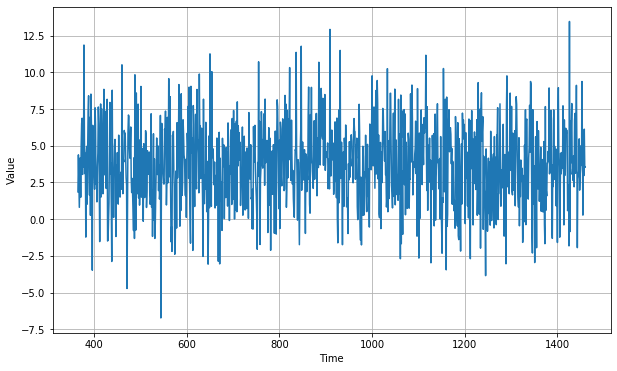

In [17]:
diff_series = (series[365:] - series[:-365]) # YOUR CODE HERE)
diff_time = time[365:] # YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()
    
# EXPECETED OUTPUT: CHart with diffs

Great, the trend and seasonality seem to be gone, so now we can use the moving average:

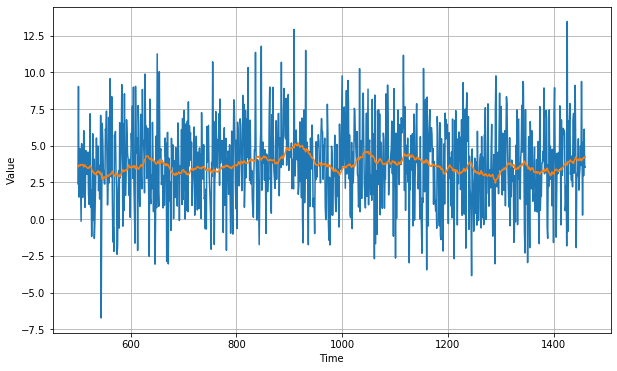

In [18]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()
            
# Expected output. Diff chart from 1100->1450 +
# Overlaid with moving average

Now let's bring back the trend and seasonality by adding the past values from t – 365:

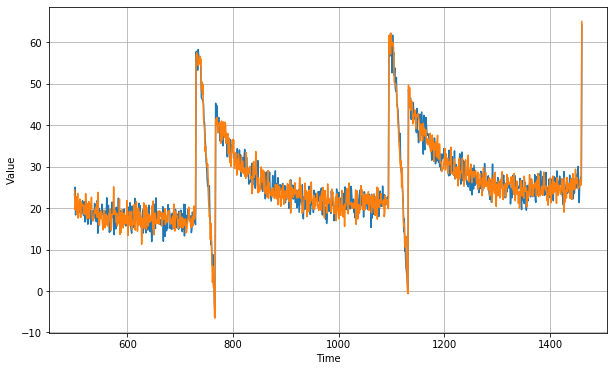

In [19]:
diff_moving_avg_plus_past = series[split_time - 365: -365] + diff_moving_avg # YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()
# Expected output: Chart from 1100->1450+ on X. Same chart as earlier for time series, but projection overlaid looks close in value to it

In [20]:
mse = np.sum((x_valid - moving_avg) ** 2) / len(x_valid)
mae = np.sum(abs (x_valid - moving_avg )) / len(x_valid)

print(mse)
print(mae)
# EXPECTED OUTPUT
# 8.498155
# 2.327179

62.629101359261185
3.956339729936264


Better than naive forecast, good. However the forecasts look a bit too random, because we're just adding past values, which were noisy. Let's use a moving averaging on past values to remove some of the noise:

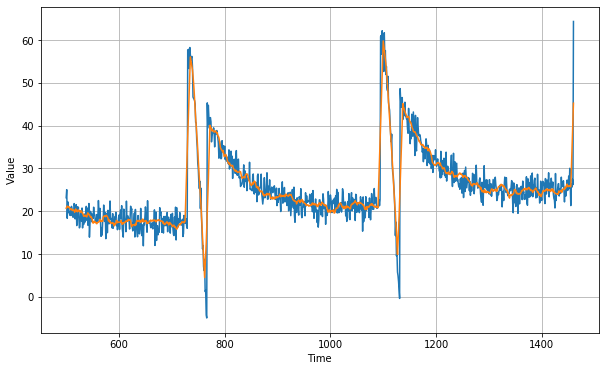

In [25]:
diff_moving_avg_plus_smooth_past = moving_average_forecast( series[split_time - 370:-360], 10) + diff_moving_avg # YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()
            
# EXPECTED OUTPUT:
# Similar chart to above, but the overlaid projections are much smoother

In [26]:
mse = np.sum((x_valid - diff_moving_avg_plus_smooth_past) ** 2) / len(x_valid)
mae = np.sum(abs (x_valid - diff_moving_avg_plus_smooth_past )) / len(x_valid)

print(mse)
print(mae)
# EXPECTED OUTPUT
# 12.527958
# 2.2034433

12.355816288371487
2.1474075873113945
